In [19]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import mnist
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# assigning global variables
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 13

In [3]:
#assigning image dimensions
img_rows, img_cols = 28, 28

In [4]:
#loading data from the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
# image reshaping based on data format
# 'channels_first' assumes the image_data_format as (channels, dim1, dim2, dim3)
# 'channels_last' assumes the image_data_format as (dim1, dim2, dim3, channels)
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [8]:
# converting y_train and y_test to categorical variables for easier computation
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [20]:
# creating the model using keras Sequential
model = keras.Sequential([
                          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [21]:
# model.summary() yields that there are about 1.2 million trainable params
# compiling the model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [22]:
# training the model using the .fit method
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(X_test, y_test))

Epoch 1/13
469/469 [==============================] - 7s 16ms/step - loss: 0.2282 - accuracy: 0.9301 - val_loss: 0.0509 - val_accuracy: 0.9826
Epoch 2/13
469/469 [==============================] - 7s 15ms/step - loss: 0.0847 - accuracy: 0.9749 - val_loss: 0.0404 - val_accuracy: 0.9865
Epoch 3/13
469/469 [==============================] - 7s 15ms/step - loss: 0.0625 - accuracy: 0.9815 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 4/13
469/469 [==============================] - 7s 15ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0366 - val_accuracy: 0.9877
Epoch 5/13
469/469 [==============================] - 7s 15ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0298 - val_accuracy: 0.9900
Epoch 6/13
469/469 [==============================] - 7s 15ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 7/13
469/469 [==============================] - 7s 15ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0315 - val_accuracy: 0.9907

In [23]:
# accuracy estimation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: ', score[1])
print('Test loss: ', score[0])

[0.027228204533457756, 0.9925000071525574]


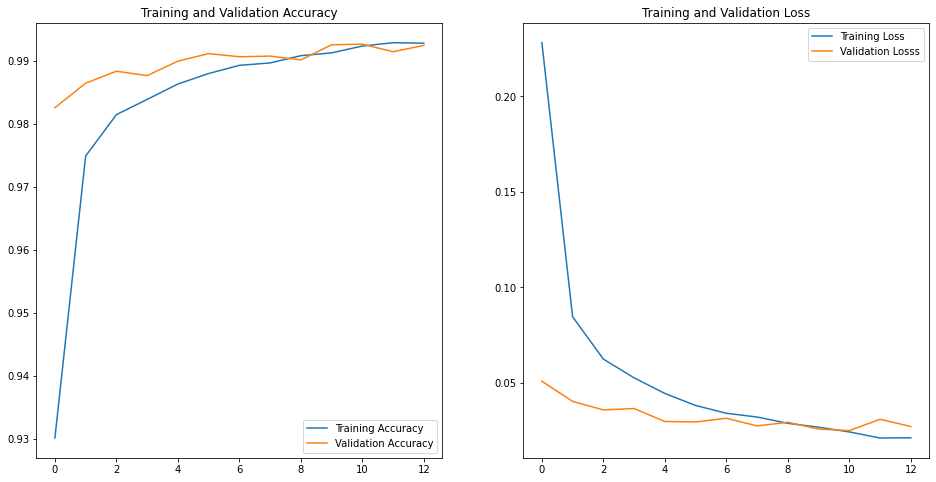

In [34]:
# visualizing the accuracy and loss
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Losss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
# saving the model
model_json = model.to_json()
with open('model.json', 'w') as f:
    f.write(model_json)

# serialize the weights to HDF5 file
model.save_weights('model.h5')
print('Model Saved')

Model Saved
